In [120]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [2]:
#os.chdir(r'C:\Users\mangn\OneDrive\Desktop\STATISTICS\Statistics_Exam')

# 1. Data Understanding and Preprocessing:

In [18]:
# Loading the dataset
df = pd.read_csv('data.csv')

In [19]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [20]:
# checking no. of row's and column's in dataframe.
df.shape

(6819, 96)

In [29]:
type(df)

pandas.core.frame.DataFrame

In [27]:
# Inspecting the dataset, shows first's 5 row's.
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [7]:
#  returns description of the data in the DataFrame.
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [8]:
# last 5 row's 
data.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [9]:
# info() helps to understand the data type and information about data, including the number of records in each column, 
# data having null or not null, Data type, the memory usage of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [10]:
# serves unique values in each column and data desc.
data.nunique()

Bankrupt?                                                      2
 ROA(C) before interest and depreciation before interest    3333
 ROA(A) before interest and % after tax                     3151
 ROA(B) before interest and depreciation after tax          3160
 Operating Gross Margin                                     3781
                                                            ... 
 Liability to Equity                                        6819
 Degree of Financial Leverage (DFL)                         6240
 Interest Coverage Ratio (Interest expense to EBIT)         6240
 Net Income Flag                                               1
 Equity to Liability                                        6819
Length: 96, dtype: int64

In [11]:
# checking null values in dataset
data.isnull()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6815,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6816,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6817,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# checking the sum of null values in dataset, as per the column's in the dataframe.
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [121]:
# it show's the sum of overall null value's in the dataframe.
data.isnull().sum().sum()

0

In [50]:
# checking for duplicate rows
data.duplicated(keep=False).sum()

0

# 2. Exploratory Data Analysis (EDA):

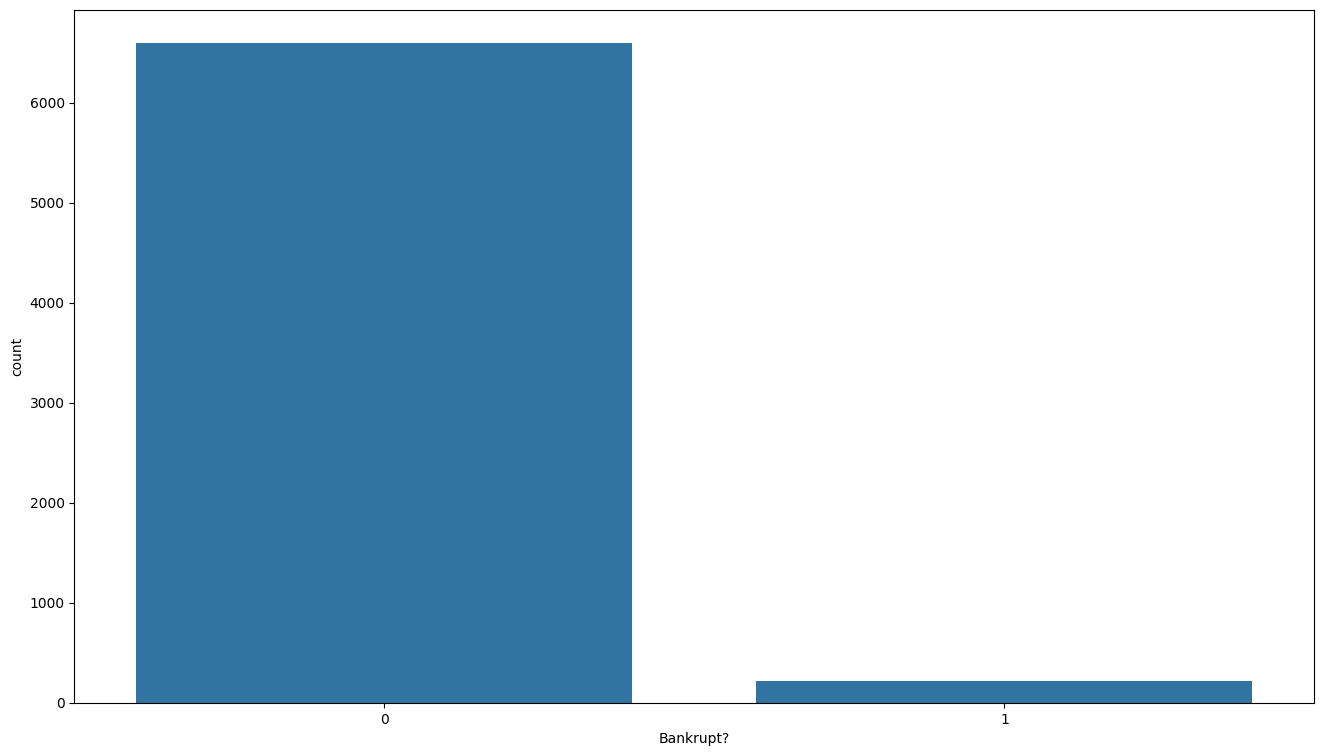

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [124]:
# Graph between count of bankrupt and no-bankrupt. 
# The x-axis represents whether a company is bankrupt (1) or not bankrupt (0).
# The y-axis shows the count of occurrences for each category.
# The plot will have two bars, one for each category (0 and 1).

plt.figure(figsize=(16,9))
sns.countplot(x='Bankrupt?', data = df)
plt.show()
print(df['Bankrupt?'].value_counts())


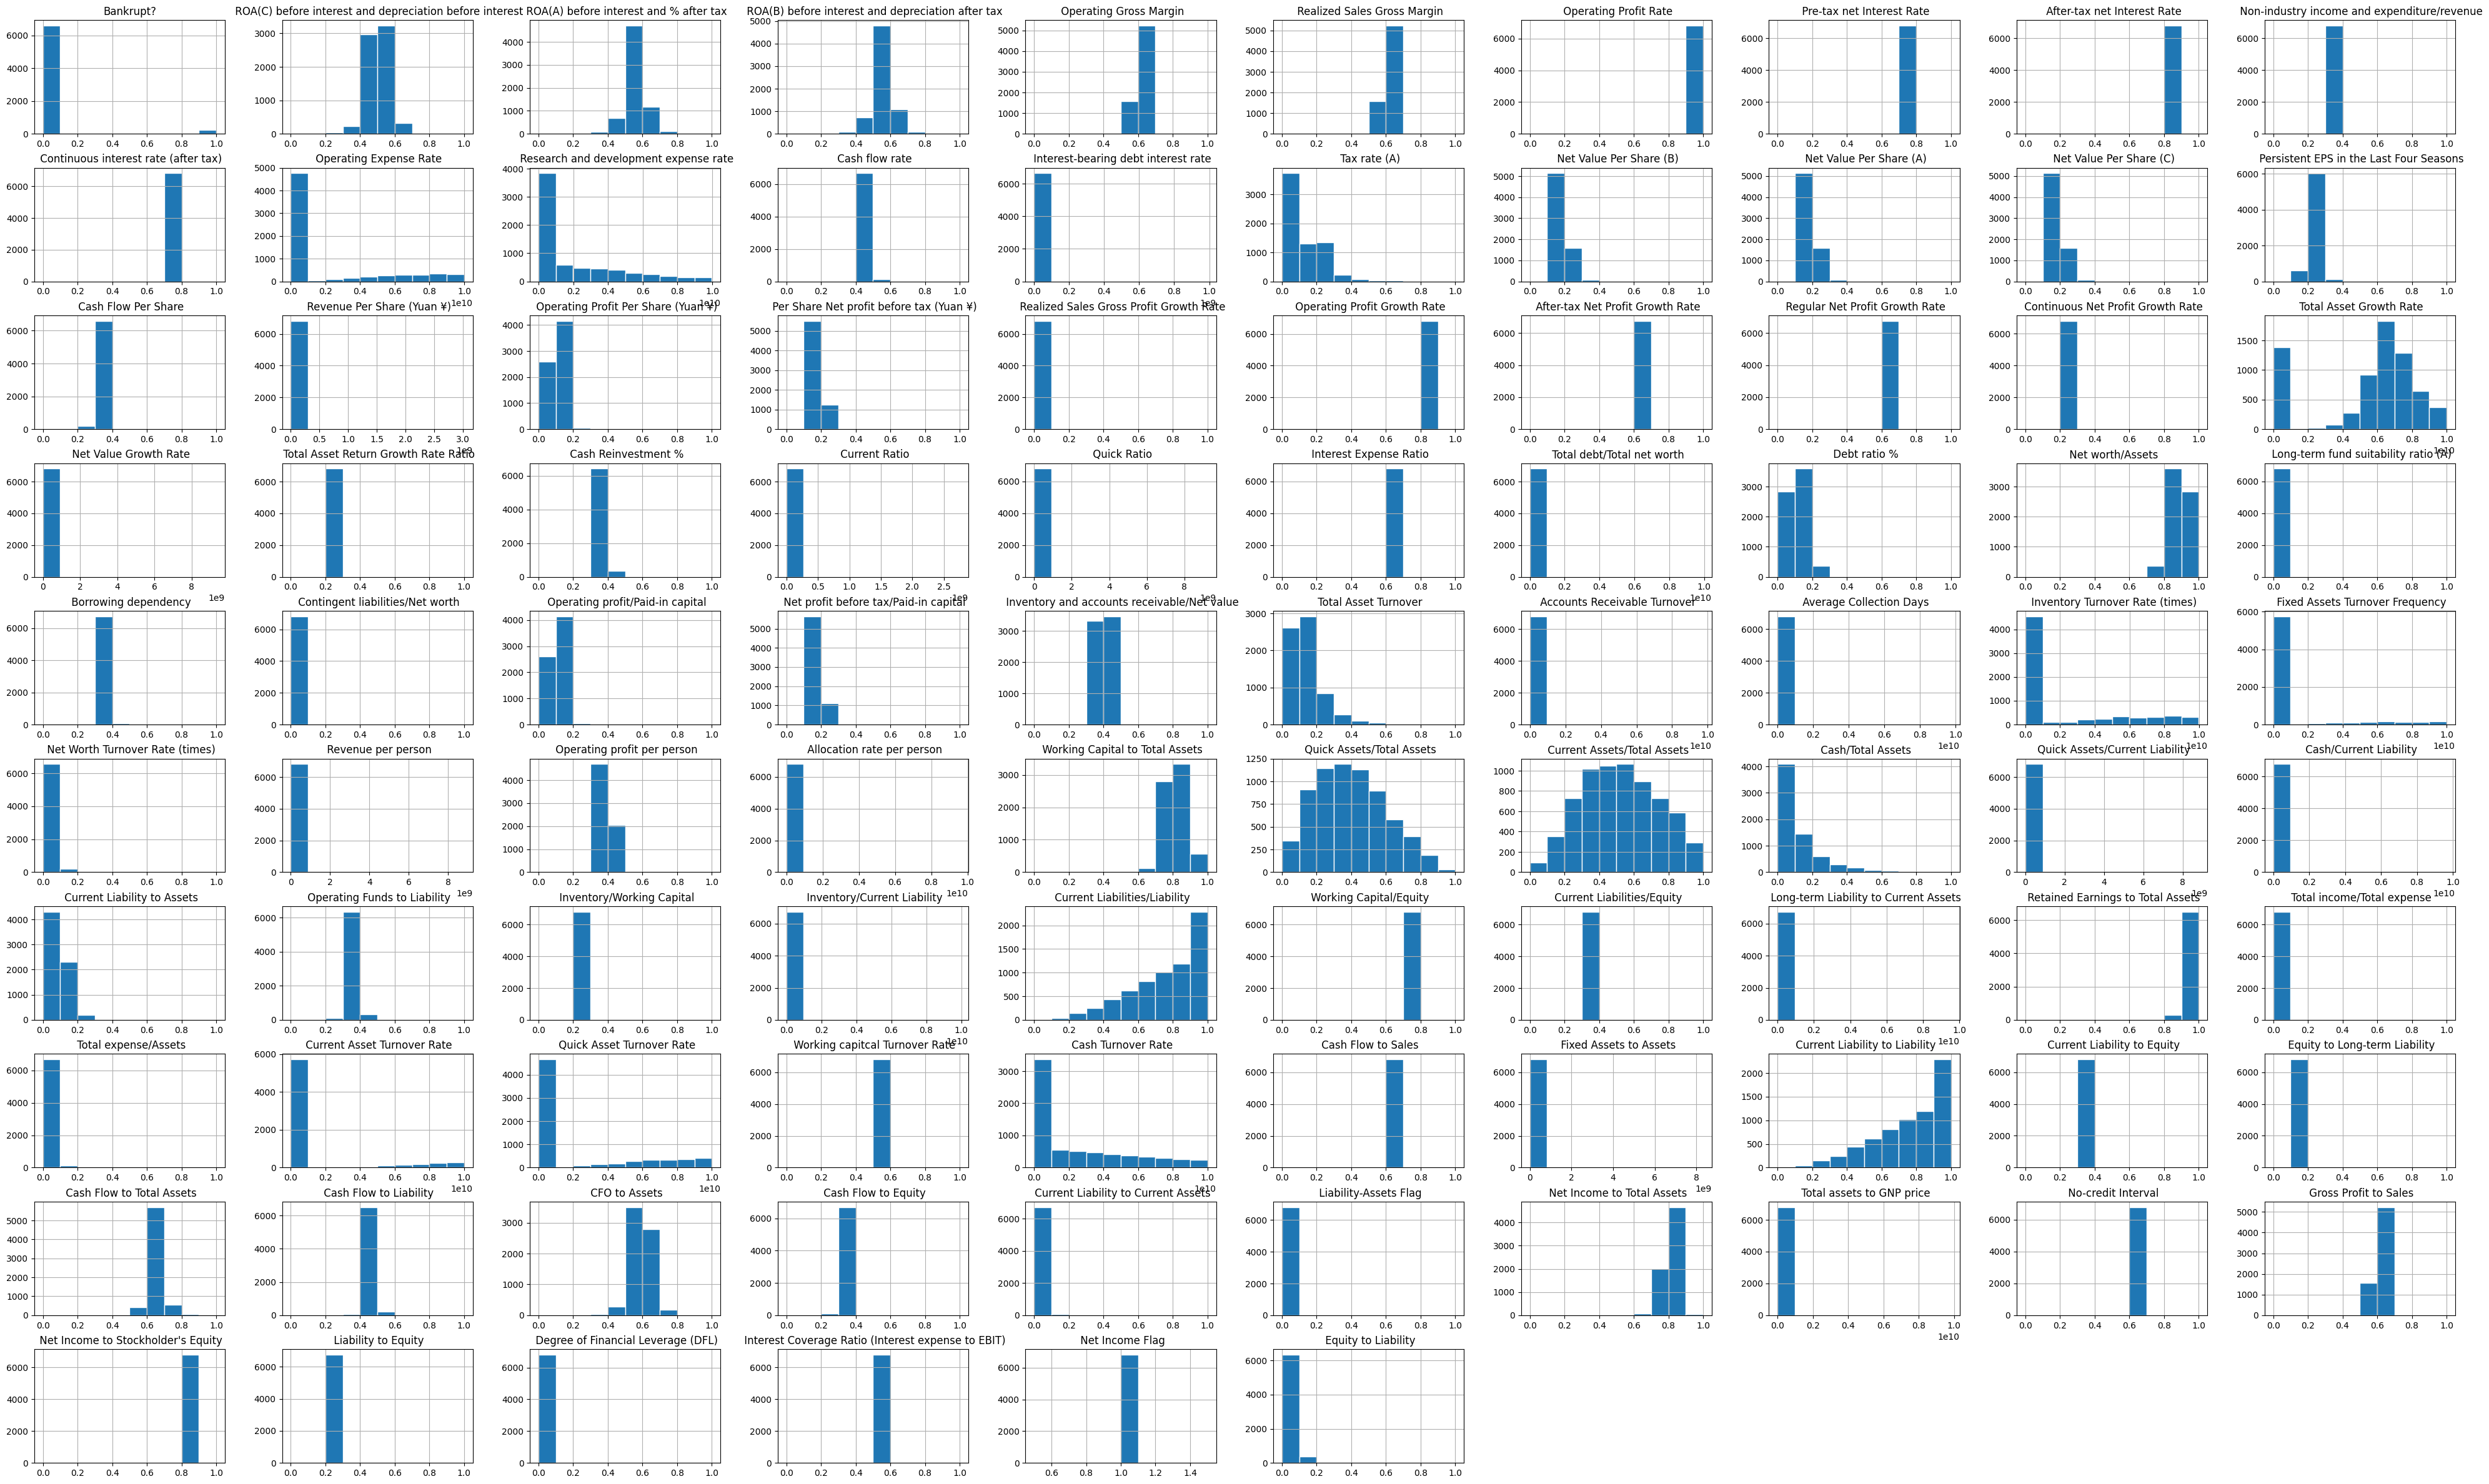

In [52]:
# Analyze relationships between features and the target variable.
# The 'df.hist(figsize=(50,30), edgecolor='white')' command generates a series of histograms for 
# each numerical column in the DataFrame df, with a large figure size for better readability.
# Each histogram displays the distribution of values within a column, helping to visualize the
# spread and central tendencies of the dataset's features.

df.hist(figsize=(50,30), edgecolor='white')
plt.show()

In [32]:
# df.corr() shows the pairwise correlation coefficients between the columns in your DataFrame.
correlation_val=df.corr()

In [33]:
correlation_val

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# selecting variable's which have a significant correlation with the target variable Bankrupt? from the correlation matrix.
# calculates the correlation of all features with the Bankrupt? column, excluding Bankrupt? itself. 
# It then selects variables with an absolute correlation greater than 0.2, identifying features with a strong relationship to bankruptcy.
bankrupt_correlation = correlation_val['Bankrupt?'].drop('Bankrupt?')
correlation_threshold = 0.2
selected_variables = bankrupt_correlation[abs(bankrupt_correlation) > correlation_threshold]

In [35]:
selected_variables

ROA(C) before interest and depreciation before interest   -0.260807
ROA(A) before interest and % after tax                    -0.282941
ROA(B) before interest and depreciation after tax         -0.273051
Persistent EPS in the Last Four Seasons                   -0.219560
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Debt ratio %                                               0.250161
Net worth/Assets                                          -0.250161
Net profit before tax/Paid-in capital                     -0.207857
Retained Earnings to Total Assets                         -0.217779
Net Income to Total Assets                                -0.315457
Name: Bankrupt?, dtype: float64

In [127]:
# calculating financial ratios. 
final_data = df[
    ['Bankrupt?',
    ' ROA(C) before interest and depreciation before interest',
     ' ROA(A) before interest and % after tax',
     ' ROA(B) before interest and depreciation after tax',
     ' Persistent EPS in the Last Four Seasons',
     ' Per Share Net profit before tax (Yuan ¥)',
     ' Debt ratio %',
     ' Net worth/Assets',
     ' Net profit before tax/Paid-in capital',
     ' Retained Earnings to Total Assets',
     ' Net Income to Total Assets']
]

In [37]:
# created new dataframe final_data that include only significant varible.

type(final_data)

pandas.core.frame.DataFrame

In [38]:
final_data.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Net Income to Total Assets
0,1,0.370594,0.424389,0.405750,0.169141,0.138736,0.207576,0.792424,0.137757,0.903225,0.716845
1,1,0.464291,0.538214,0.516730,0.208944,0.169918,0.171176,0.828824,0.168962,0.931065,0.795297
2,1,0.426071,0.499019,0.472295,0.180581,0.142803,0.207516,0.792484,0.148036,0.909903,0.774670
3,1,0.399844,0.451265,0.457733,0.193722,0.148603,0.151465,0.848535,0.147561,0.906902,0.739555
4,1,0.465022,0.538432,0.522298,0.212537,0.168412,0.106509,0.893491,0.167461,0.913850,0.795016
5,1,0.388680,0.415177,0.419134,0.174435,0.138811,0.180427,0.819573,0.137825,0.903041,0.710420
6,0,0.390923,0.445704,0.436158,0.161482,0.128945,0.216102,0.783898,0.127939,0.911441,0.736619
7,0,0.508361,0.570922,0.559077,0.225206,0.180462,0.108202,0.891798,0.179519,0.935449,0.815350
8,0,0.488519,0.545137,0.543284,0.218398,0.173157,0.058591,0.941409,0.172159,0.935200,0.803647
9,0,0.495686,0.550916,0.542963,0.217831,0.176621,0.121293,0.878707,0.175658,0.938290,0.804195


In [39]:
final_data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Net Income to Total Assets
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.228813,0.184361,0.113177,0.886823,0.182715,0.934733,0.807760
std,0.176710,0.060686,0.065620,0.061595,0.033263,0.033180,0.053920,0.053920,0.030785,0.025564,0.040332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.214711,0.170370,0.072891,0.851196,0.169376,0.931097,0.796750
50%,0.000000,0.502706,0.559802,0.552278,0.224544,0.179709,0.111407,0.888593,0.178456,0.937672,0.810619
75%,0.000000,0.535563,0.589157,0.584105,0.238820,0.193493,0.148804,0.927109,0.191607,0.944811,0.826455
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel=' Net worth/Assets'>

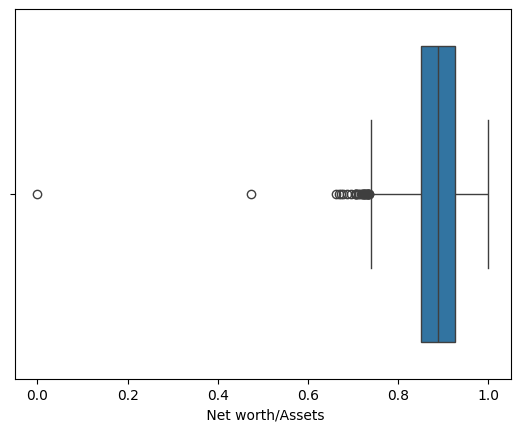

In [40]:
# A boxplot is a way to visually summarize a set of numerical data.
sns.boxplot(x=final_data[' Net worth/Assets'])

<Axes: xlabel=' ROA(C) before interest and depreciation before interest'>

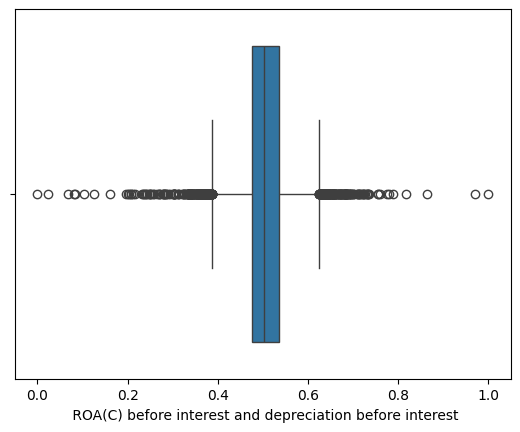

In [41]:

sns.boxplot(x=final_data[' ROA(C) before interest and depreciation before interest'])

<Axes: xlabel=' Debt ratio %'>

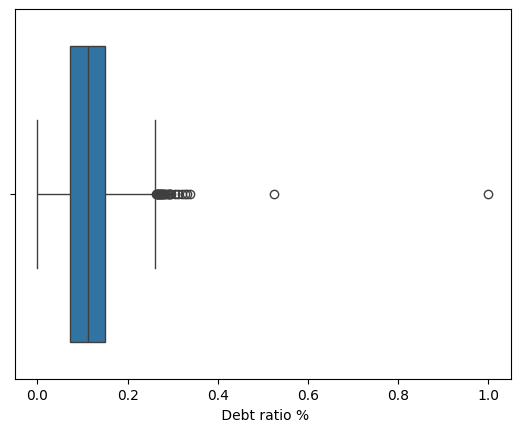

In [42]:
sns.boxplot(x=final_data[' Debt ratio %'])

<Axes: xlabel=' Persistent EPS in the Last Four Seasons'>

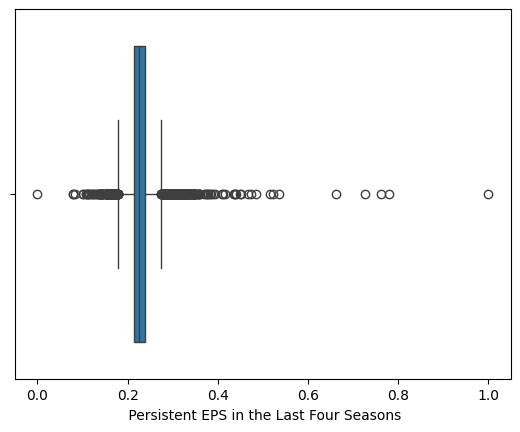

In [43]:
sns.boxplot(x=final_data[' Persistent EPS in the Last Four Seasons'])

<Axes: xlabel=' Net profit before tax/Paid-in capital'>

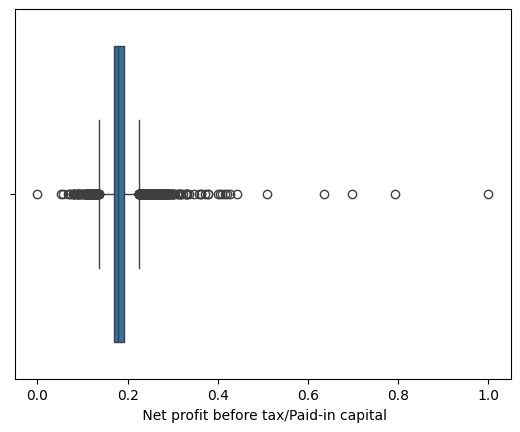

In [44]:
sns.boxplot(x=final_data[' Net profit before tax/Paid-in capital'])

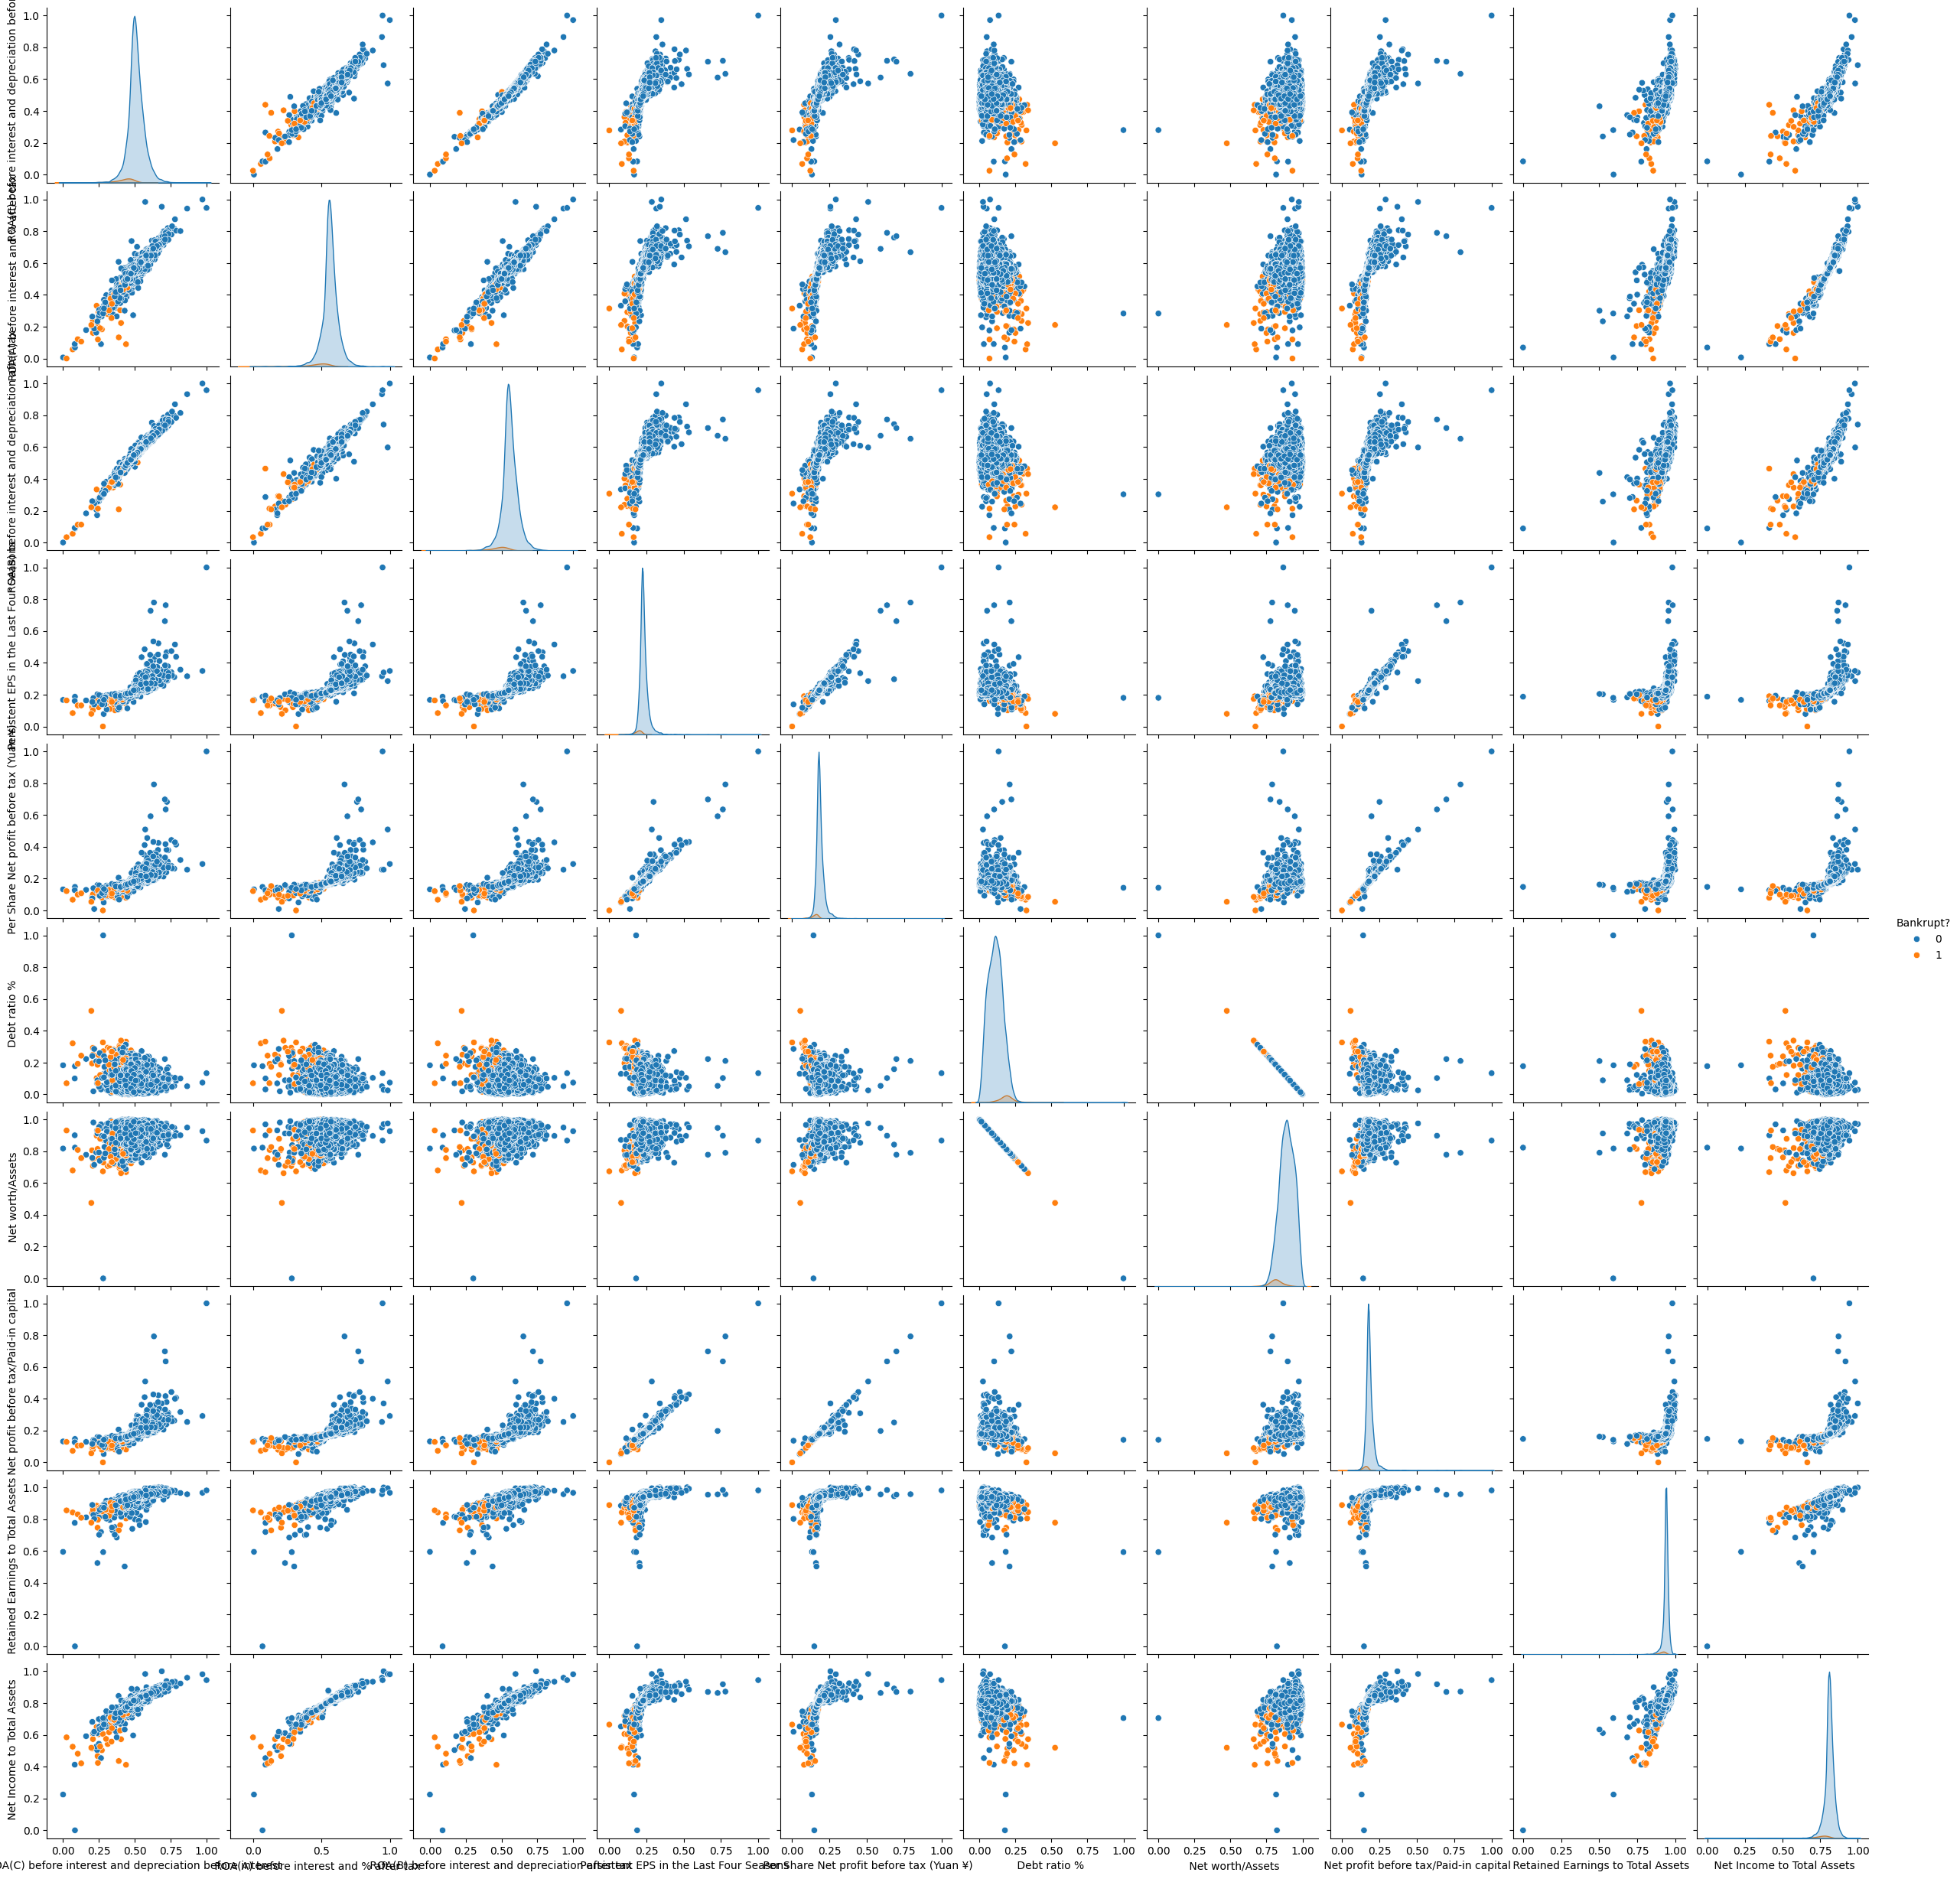

In [129]:
# Pairplot to see relationships
sns.pairplot(final_data, hue='Bankrupt?')
plt.show()


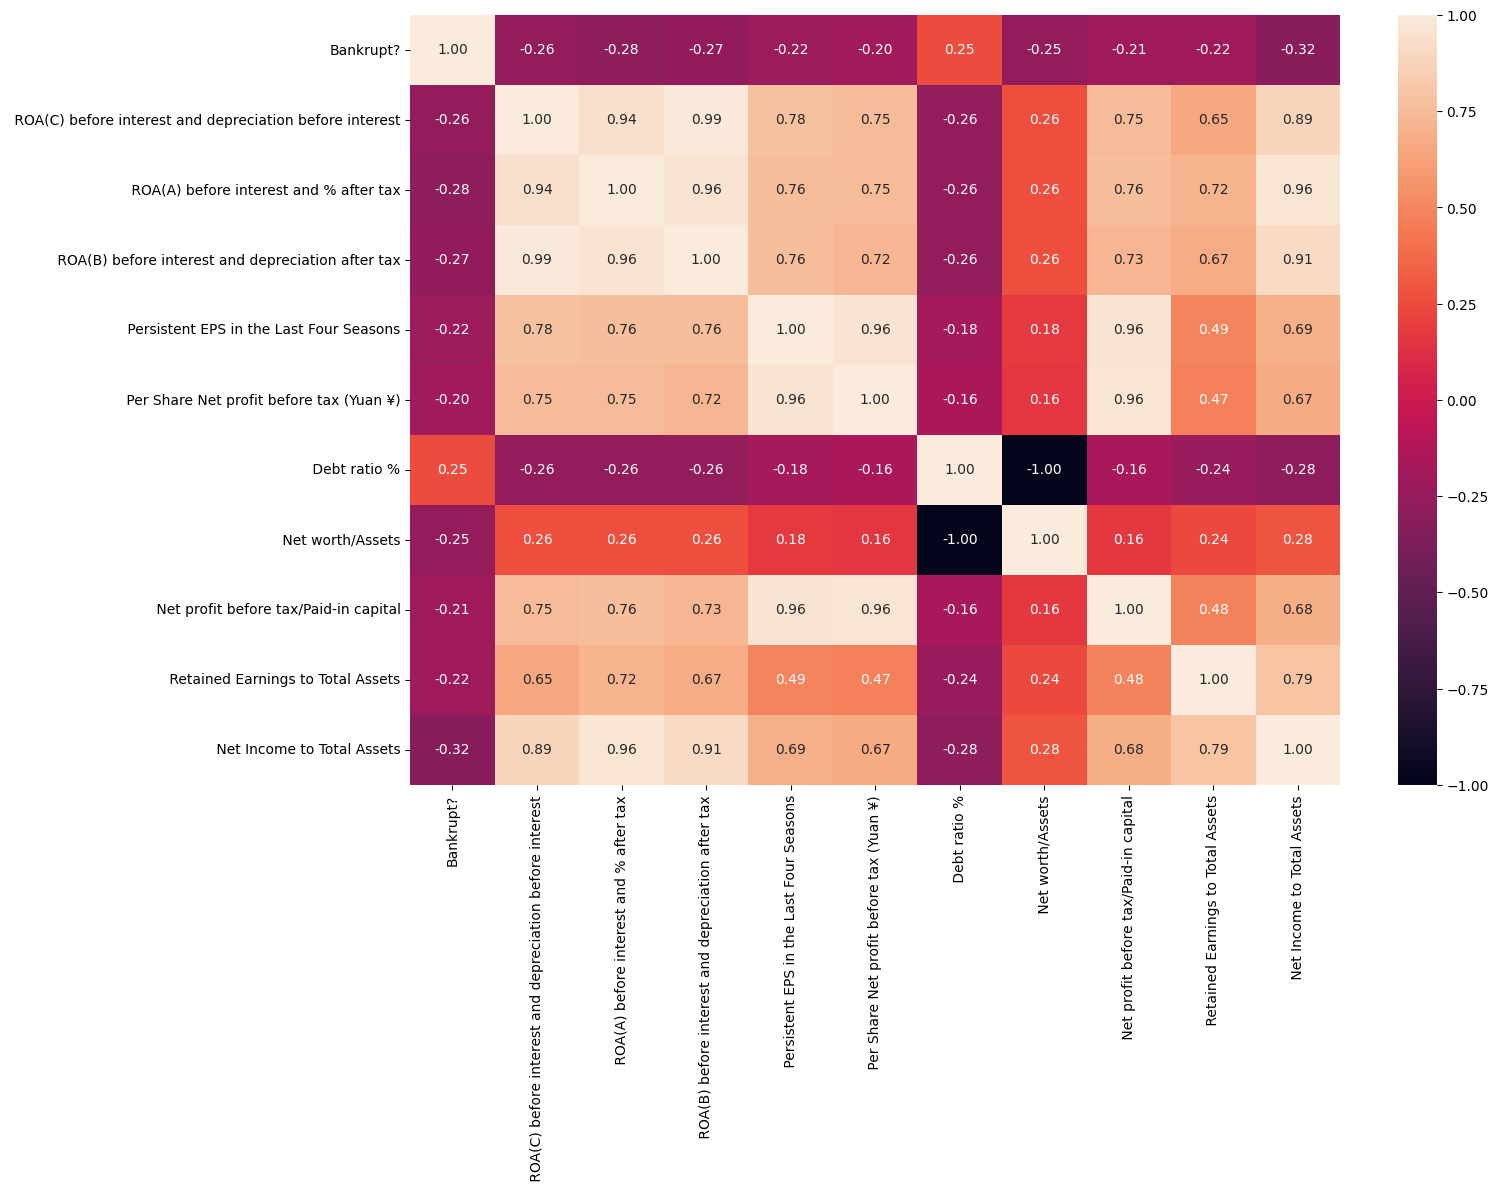

In [128]:
# This command creates a heatmap displaying the correlation matrix of final_data, with annotated correlation coefficients, helping to identify 
# the strength and direction of linear relationships between features. A heatmap uses color gradients to represent data values, making it easy to 
# see patterns and correlations at a glance.

plt.figure(figsize=(15, 10))
sns.heatmap(final_data.corr(), annot=True, fmt=".2f")
plt.show()

# 3. Hypothesis Testing:

# Perform hypothesis testing to identify significant features influencing bankrupcy.

In [141]:
from scipy.stats import ttest_ind

# Perform t-test for each feature
significant_features = []
for col in final_data.columns[:-1]:
    bankrupt = final_data[final_data['Bankrupt?'] == 1][col]
    non_bankrupt = final_data[final_data['Bankrupt?'] == 0][col]
    t_stat, p_val = ttest_ind(bankrupt, non_bankrupt)
    if p_val < 0.05:
        significant_features.append(col)

print(f'Significant features: {significant_features}')

Significant features: ['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets', ' Net profit before tax/Paid-in capital', ' Retained Earnings to Total Assets']


C:\Users\mangn\AppData\Local\Temp\ipykernel_17504\2365243847.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = ttest_ind(bankrupt, non_bankrupt)


In [ ]:
Null Hypothesis (Ho): The financial features (e.g., revenue, profit margin, debt ratio, etc.) do not have a significant relationship 
with the bankruptcy status of a company.
------------------------------------------------------------------------------------------
Alternative Hypothesis (Ha): The financial features have a significant relationship with the bankruptcy status of a company.

In [ ]:
# p_value < level of significance=Reject Null Hypothesisp_value > level of significance=Do not Reject
# Null Hypothesis

# 4. Feature Engineering and Selection:

<Axes: >

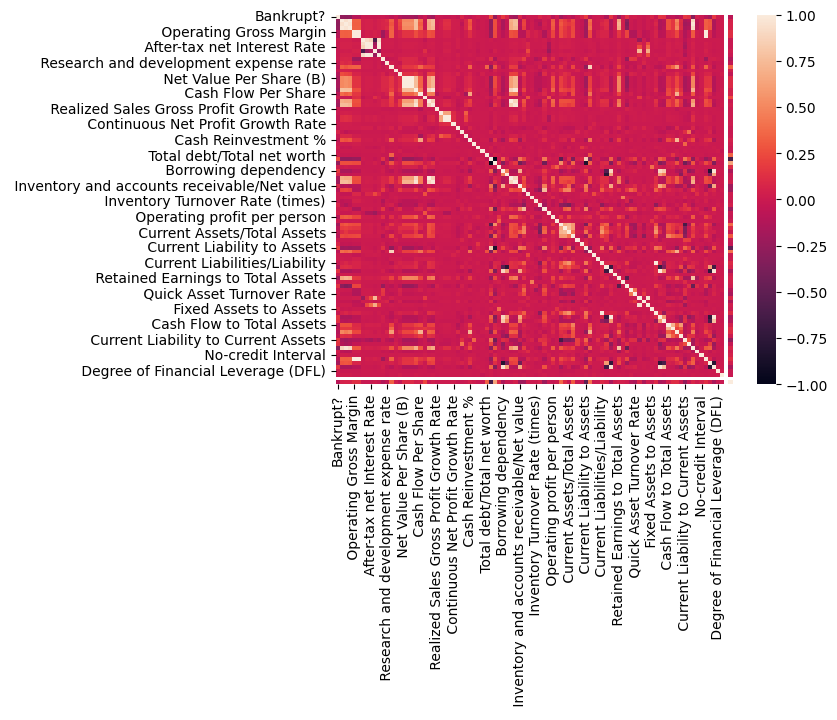

In [105]:
#Analyze relationships between features and the target variable.
relation = df.corr()
sns.heatmap(relation)

   # 5. Modeling:


In [78]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Split the data into training and testing sets.
# Train = 75% and Test 25%

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [88]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features = final_data.drop(columns='Bankrupt?')
targets = pd.DataFrame(df['Bankrupt?'])
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size = 0.25)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, Y_train)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9898, 10)
(1705, 10)
(9898, 1)
(1705, 1)


In [ ]:
The code splits the dataset into training and testing sets with 75% for training and 25% for testing. 
It then applies SMOTE (Synthetic Minority Over-sampling Technique) to the training set to balance the 
classes by generating synthetic samples for the minority class, resulting in balanced training data.


In [143]:
# Applying logistic regression for classification
# Initialize and fit the model 
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
Y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, Y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7929618768328446


C:\Users\mangn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
The code initializes and trains a logistic regression model using the balanced training data. 
It then predicts the target values for the test set and evaluates 
the model's performance by calculating and printing the accuracy score (0.7929618768328446).


In [87]:
pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ------------------------------- -------- 204.8/258.3 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [99]:
from sklearn.metrics import accuracy_score, classification_report

In [144]:
# Evaluate model performance using appropriate metrices.

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1647
           1       0.03      0.19      0.06        58

    accuracy                           0.79      1705
   macro avg       0.50      0.50      0.47      1705
weighted avg       0.93      0.79      0.86      1705



In [ ]:
The classification_report function prints a comprehensive report showing precision, recall, F1-score, and support for each 
class (in this case, bankrupt and non-bankrupt) based on the predicted and actual values from y_test and y_pred. 
It provides insights into the model's performance across different metrics.

In [147]:
# Confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Y_pred))

[[1341  306]
 [  47   11]]


In [ ]:
The confusion_matrix function computes and prints a matrix that summarizes the counts of true positive, true negative, 
false positive, and false negative predictions, illustrating the model's accuracy in predictingboth classes.

# 6. Model Interpretation and Insights:

In [152]:
print('Intercept:', model.intercept_[0])
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
print(coef_df)

Intercept: 20.961122585329754
                                             Feature  Coefficient
0   ROA(C) before interest and depreciation befor...    -6.240737
1             ROA(A) before interest and % after tax    -2.742270
2   ROA(B) before interest and depreciation after...    -4.919415
3            Persistent EPS in the Last Four Seasons    -6.271962
4           Per Share Net profit before tax (Yuan ¥)    -4.579354
5                                       Debt ratio %    11.571217
6                                   Net worth/Assets   -11.218709
7              Net profit before tax/Paid-in capital    -5.015721
8                  Retained Earnings to Total Assets    -0.427936
9                         Net Income to Total Assets    -3.738007


# SUMMARY :

In [ ]:
#Positive coefficients indicate higher probability of bankruptcy.
#Negative coefficients indicate lower probability of bankruptcy.
#ROA(C) before interest and depreciation: -6.24
#Interpretation: Higher ROA(C) significantly reduces the probability of bankruptcy.
#Debt ratio %: 11.57
##Net worth to Assets: -11.218
#nterpretation: Higher net worth significantly reduces the probability of bankruptcy.
#5. Key Findings:
#The analysis identified that ROA, debt ratio, and net worth are critical indicators of a company's financial health and its likelihood of facing bankruptcy.

#  Actionable Recommendations: 

In [ ]:
#Provide Actionable Recommendation
#The best model given is the Logistic Regression Model.
#The accuracy of the built model is 79.29%.
#Improve Asset Efficiency by optimizing the utilization of their assets.
#The logistic regression analysis provides valuable insights into the 
#financial metrics that influence corporate bankruptcy. By focusing on 
#improving ROA, managing debt levels, and increasing net worth, companies 
#can significantly reduce their bankruptcy risks. Implementing these recommendations
#and continuously monitoring financial health will be crucial for sustainable growth
#and stability.

In [61]:
# frequency of bankruptcy
sns.catplot("Bankrupt?", data=bankprt, kind='count')

NameError: name 'bankprt' is not defined

In [54]:
x=data.drop('Bankrupt?',axis=1)
y=data['Bankrupt?']

In [55]:
# looking at the historgram of numerical data 
bankpt.hist(figsize=(35,30),bin=50)
plt.show()

NameError: name 'bankpt' is not defined

In [56]:
# ploting x and y axis
y = bankpt['Bankrupt?']
x = bankpt['']

NameError: name 'bankpt' is not defined

           Bankrupt?  \
Bankrupt?        1.0   

            ROA(C) before interest and depreciation before interest  \
Bankrupt?                                           -0.25969          

            ROA(A) before interest and % after tax  \
Bankrupt?                                -0.282005   

            ROA(B) before interest and depreciation after tax  \
Bankrupt?                                          -0.271836    

            Operating Gross Margin  
Bankrupt?                -0.099957  


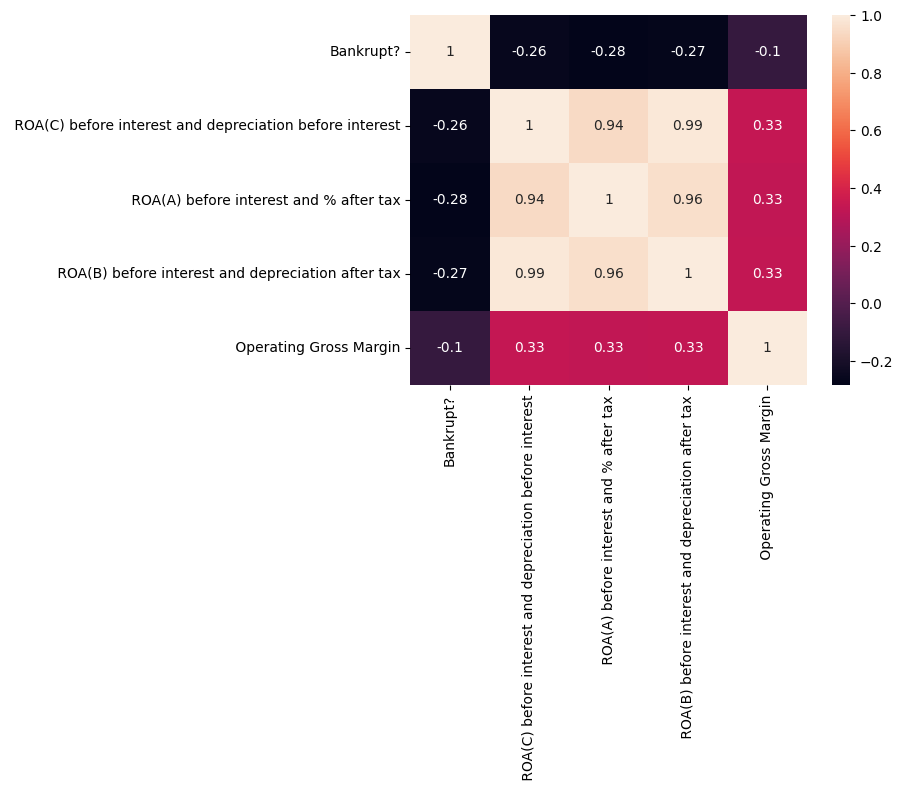

In [57]:
correlation = data.iloc[1:,0:5].corr()
sns.heatmap(correlation,annot=True)
corr_bank = correlation.iloc[0:1,]
print(corr_bank)

In [58]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data = data[~((data < (Q1 - 3 * IQR)) |(data > (Q3 + 3 * IQR))).any(axis=1)]
data.shape

Bankrupt?                                                   0.000000
 ROA(C) before interest and depreciation before interest    0.059036
 ROA(A) before interest and % after tax                     0.053614
 ROA(B) before interest and depreciation after tax          0.056829
 Operating Gross Margin                                     0.013469
                                                              ...   
 Liability to Equity                                        0.004505
 Degree of Financial Leverage (DFL)                         0.000122
 Interest Coverage Ratio (Interest expense to EBIT)         0.000566
 Net Income Flag                                            0.000000
 Equity to Liability                                        0.028361
Length: 96, dtype: float64


(1379, 96)

       Bankrupt?   ROA(C) before interest and depreciation before interest  \
count     1379.0                                        1379.000000          
mean         0.0                                           0.517762          
std          0.0                                           0.037453          
min          0.0                                           0.384878          
25%          0.0                                           0.494833          
50%          0.0                                           0.514405          
75%          0.0                                           0.540023          
max          0.0                                           0.644859          

        ROA(A) before interest and % after tax  \
count                              1379.000000   
mean                                  0.573964   
std                                   0.036653   
min                                   0.422536   
25%                                   0.554596 

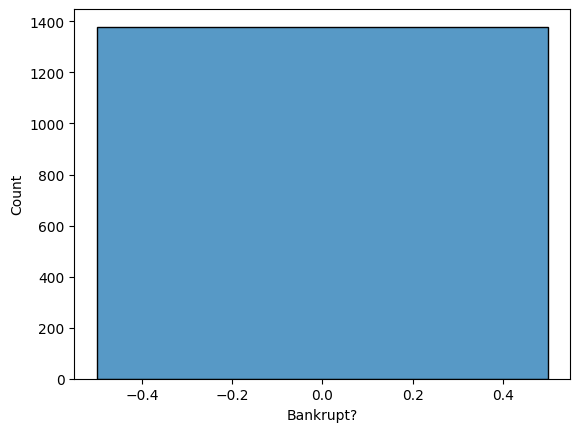

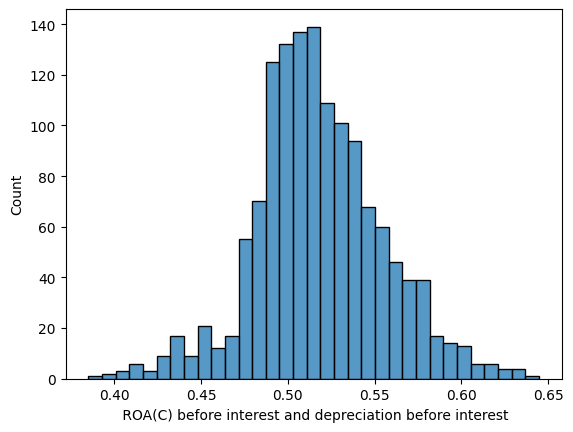

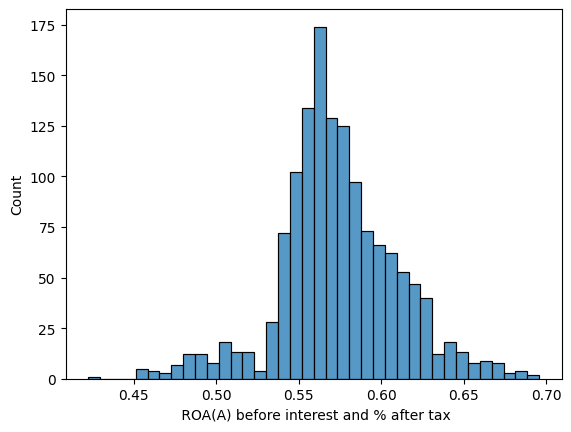

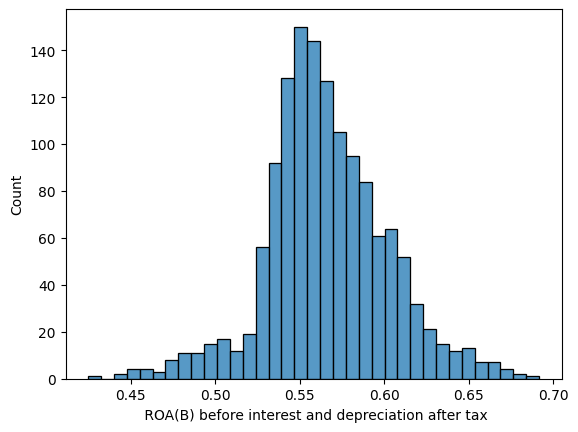

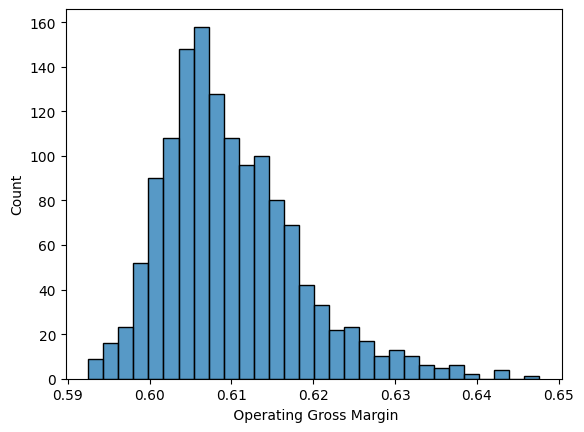

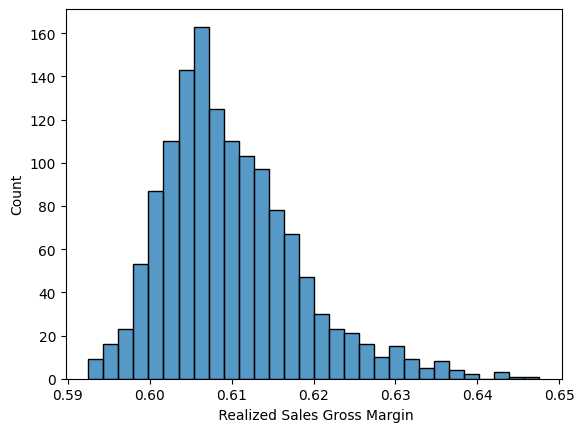

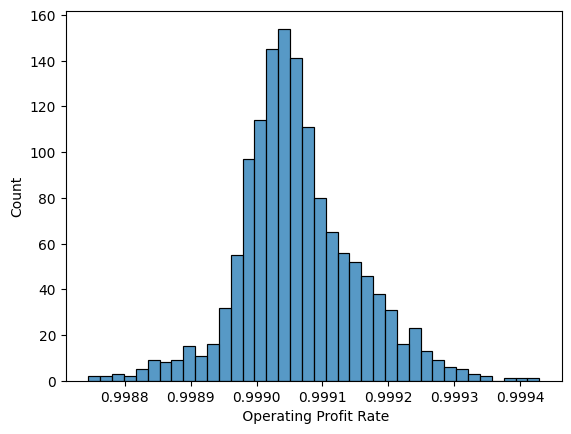

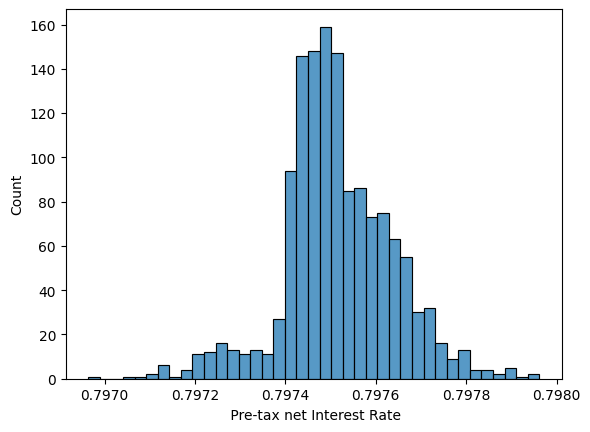

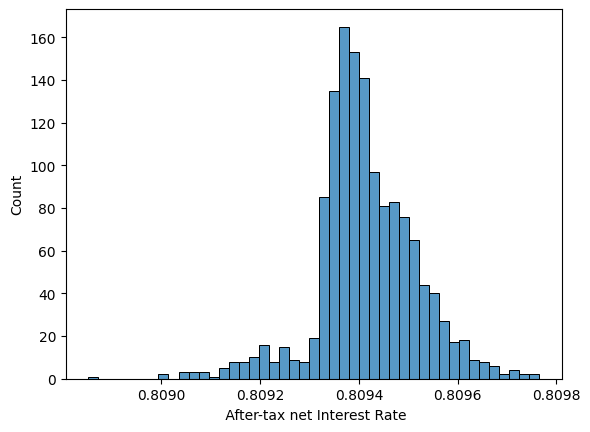

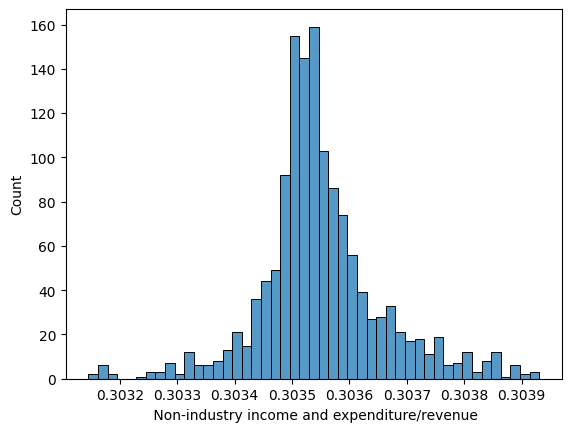

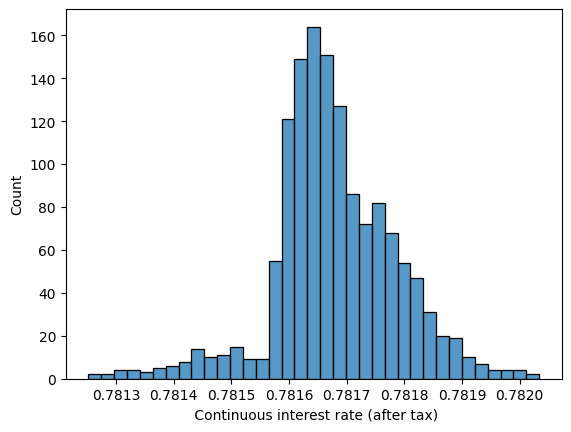

MemoryError: Unable to allocate 1.23 PiB for an array with shape (173322738581884,) and data type float64

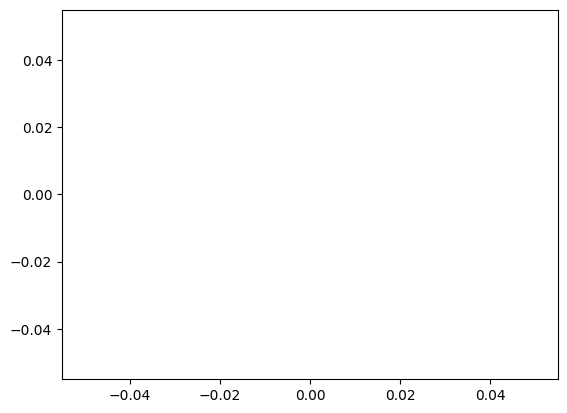

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(data.describe())

# Visualize feature distributions
for column in data.columns:
    sns.histplot(data[column])
    plt.show()

# Analyze relationships between features and the target variable
sns.pairplot(data, hue='Bankrupt?')
plt.show()
